# Usamah Kabuye: Spring 2024 BCB 546, Python Assignment 

This assignment has two sections based on python:

1. Functions - writing and documentation of functions

2. Main - data manipulation and visualization

# Functions

## 1. Documentation of Dr. X's function 

* Dr. X's function with comments 

In [1]:
# Installing "Biopython" 
!pip install Biopython 

In [2]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

In [3]:
# Importing the fasta file and selecting sequences 
def get_sequences_from_file(fasta_fn):    
    # Open an empty dictionary
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        # Split the description of the sequence so that each word appears on a single line
        description = record.description.split()
        # Arrange the species_name in the dictionary
        # call the words on the first and second rows, with a space in between them denoted as `" "`
        species_name = description[1] + " " + description[2]
        # Designate the created species_name to the respective sequence in the dictionary
        sequence_data_dict[species_name] = record.seq
    # Storing the resultant dictionary
    return(sequence_data_dict)

## 2. Function that translates a string of nucleotides to amino acids

* This function is based on Dr. X's pseudo code 

In [4]:
from Bio.Data import CodonTable
from Bio.Seq import Seq

In [5]:
def translate_function(string_nucleotides):
    # Retriving vertebrate mitochondrial table of codons
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    # open an empty string for storing the nucleotide sequences
    aa_seq_string = ''
    for i in range(1, len(string_nucleotides), 3):
        # consider a codon to be every other three nucleotides in length
        codon = string_nucleotides[i:i+3]
        # if we encounter any of these sequences / triplet stop codons, the read should stop
        if codon in ["TAA", "TAG", "AGA", "AGG"]:
            return aa_seq_string
        # Final aa sequence obtained by assigning codon letters from the mito_table to the identified codons
        aa_seq_string = aa_seq_string+mito_table.forward_table[codon]
    return(aa_seq_string)

## 3. Alternative translation function

* An alternative function that translates a string of nucleotides to amino acids

In [6]:
# We can use the 'seq.translate()' funtion of BioPython library to directly translate a string of nucleotides to amino acids
def translate_viaLib(string_nucleotides):
    # we annotate the called sequences with the Vertebrate Mitochondrial table to stop whenever a stop codon is encountered in the sequence
    seq_string = Seq.translate(string_nucleotides, table=2, to_stop=True)
    return seq_string # "seq_string" is the output sequence

## 4. Function that analyzes amino acid count 

* A function that calculates the molecular weight of each 3 amino acid sequence

In [7]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

# Calling the created amino acid sequence 
def compute_molecular_weight(aa_seq):
    # ProteinAnalysis function makes a temporary sequence as a string 
    temp_aa = ProteinAnalysis(aa_seq)
    # calculate the molecular weight for the temporary protein
    molecular_wt = temp_aa.molecular_weight() 
    return molecular_wt

## 5. Function that computes the GC-content of each DNA sequence

* Analyzing the GC content

In [8]:
def gc_content(dna_string):
    g_count = dna_string.count("G") # counts how many times G appears in the DNA seq
    c_count = dna_string.count("C") # counts how many times C appears in the DNA seq
    string_length = len(dna_string) # computes the length of the provided sequence
    gc = (c_count+g_count)/string_length # sum the g and c and returns the value as a ratio of the entire sequence length 
    return  gc # GC-content 

# Main

## 6. Adding two new columns to the penguin data frame

In [9]:
import numpy as np
file1 = 'penguins_cytb.fasta'
cytb_seqs = get_sequences_from_file(file1)

In [10]:
penguins_df = pd.read_csv("penguins_mass.csv") # original penguins_df includes body mass

In [11]:
species_list = list(penguins_df.species)

In [12]:
for index, row in penguins_df.iterrows():
            # create two new columns with 'NaN' to indicate empty cells
            penguins_df.loc[index,'Molecular_wt'] = 'NaN'
            penguins_df.loc[index,'GC content'] = 'NaN'

## 7. For-loop

* A for-loop that translates each sequence and also gets molecular weight and computes the GC content of each translated sequence and adds those data to penguin data frame

In [13]:
# Creating empty lists for molecular weight and GC content
molecular_wt_list = []
gc_content_list = []
# In the for-loop, each key represents a species, value is the DNA sequence for each species
for key, value in cytb_seqs.items():
    aa_seq = translate_viaLib(value) # translates the DNA sequence
    molecular_wt = compute_molecular_weight(str(aa_seq)) # computes the seq's molecular weight
    gc_prop = gc_content(value) # computes the GC-content
    # Assign the computed values to the previously empty lists
    molecular_wt_list.append(molecular_wt)
    gc_content_list.append(gc_prop)

# Replace 'NaN' with the results of computation
penguins_df["Molecular_wt"] = molecular_wt_list
penguins_df["GC content"] = gc_content_list

In [14]:
# Verying that the new penguins data frame contains the two additional columns of molecular weight and GC-content
penguins_df

,species,mass,Molecular_wt,GC content
0,Aptenodytes forsteri,28.00,42459.6021,0.483815
1,Aptenodytes patagonicus,13.40,42563.7067,0.496938
2,Eudyptes chrysocome,2.80,42475.5753,0.511811
3,Eudyptes chrysolophus,4.50,42445.5493,0.509186
4,Eudyptes sclateri,4.25,42475.5753,0.508311
5,Eudyptula minor,1.60,42491.6408,0.492563
6,Pygoscelis adeliae,4.60,42458.6140,0.490814
7,Pygoscelis antarctica,4.10,42404.5423,0.477690
8,Pygoscelis papua,6.10,42595.8759,0.471566
9,Spheniscus demersus,3.20,42431.5490,0.482940


## 8. Bar-chart

* A bar-chart of the mass with the x-axis labeled with species names

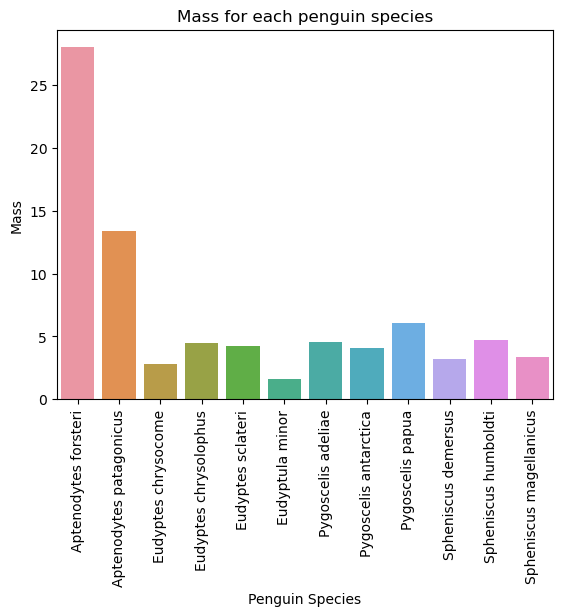

In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.barplot(x='species', y='mass', data=penguins_df)
plt.xlabel('Penguin Species')
plt.ylabel('Mass')
plt.title('Mass for each penguin species')
plt.xticks(rotation=90)
plt.show()

### Answers to Q1 and Q2

1. *Eudyptula minor* is the smallest penguin species.

2. The geographical range of *Eudyptula minor* (the Little Penguin) encompasses coastal regions of Australia and New Zealand, including various subspecies distributed across these areas.

## 9. Visualization of the molecular weight and GC-content

* Scatter plot of the molecular weight (y-axis) as a function of GC-content (x-axis)

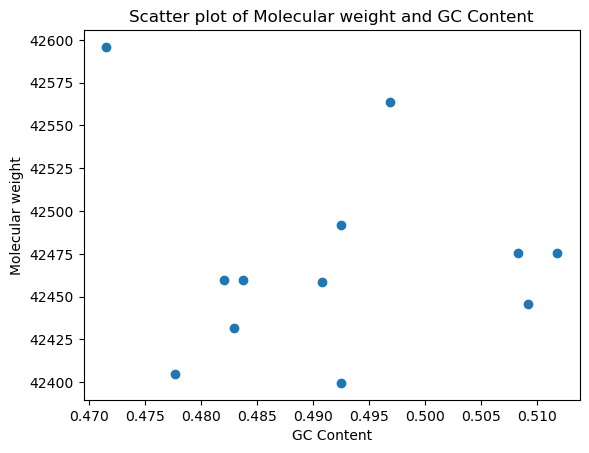

In [16]:
import matplotlib.pyplot as plt

# Assuming penguins_df is already defined and loaded with the data
plt.scatter(penguins_df['GC content'], penguins_df['Molecular_wt'])
plt.xlabel('GC Content')
plt.ylabel('Molecular weight')
plt.title('Scatter plot of Molecular weight and GC Content')
plt.show()

## 10. Saving the new data frame

* Saving the new data frame to a file called "penguins_mass_cytb.csv"

In [17]:
penguins_df.to_csv('penguins_mass_cytb.csv', index=False)

## 11. Bonus

I made the optional visualizations using:  
1. Box plot
2. Violin plot
3. Histograms  

### Box plot

* To provide a simplified snapshot of the distribution of mass for penguin species and identifying central tendency, skewness, spread, and outliers.

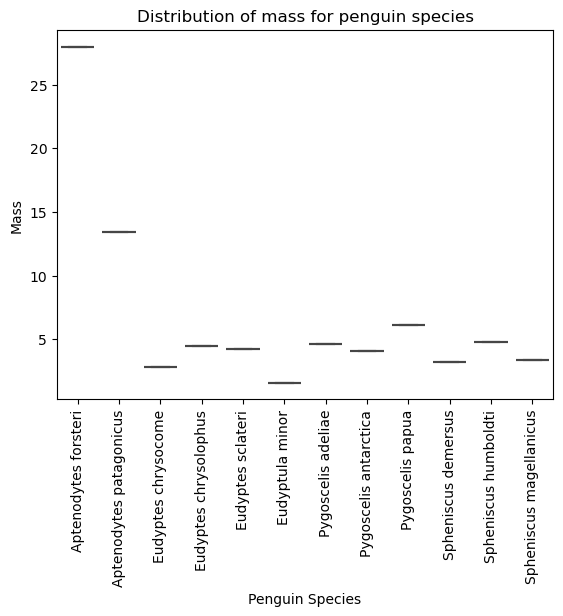

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='species', y='mass', data=penguins_df)
plt.xlabel('Penguin Species')
plt.ylabel('Mass')
plt.title('Distribution of mass for penguin species')
plt.xticks(rotation=90)
plt.show()


### Violin plot

* To provide a simplified snapshot of the distribution of mass for penguin species and identifying central tendency, skewness, spread, and outliers.

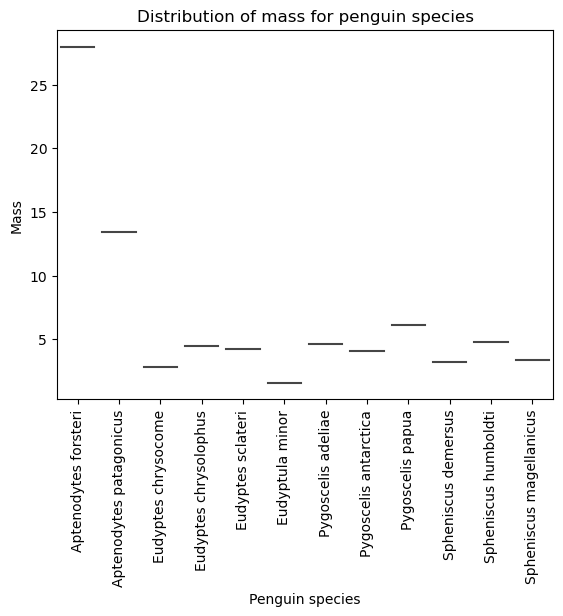

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x='species', y='mass', data=penguins_df)
plt.xlabel('Penguin species')
plt.ylabel('Mass')
plt.title('Distribution of mass for penguin species')
plt.xticks(rotation=90)
plt.show()


### Histograms

* To display the frequency distribution of data, making it easy to convey the distribution patterns, central tendency, and variability of the penguins data


c:\Users\magal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\magal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\magal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


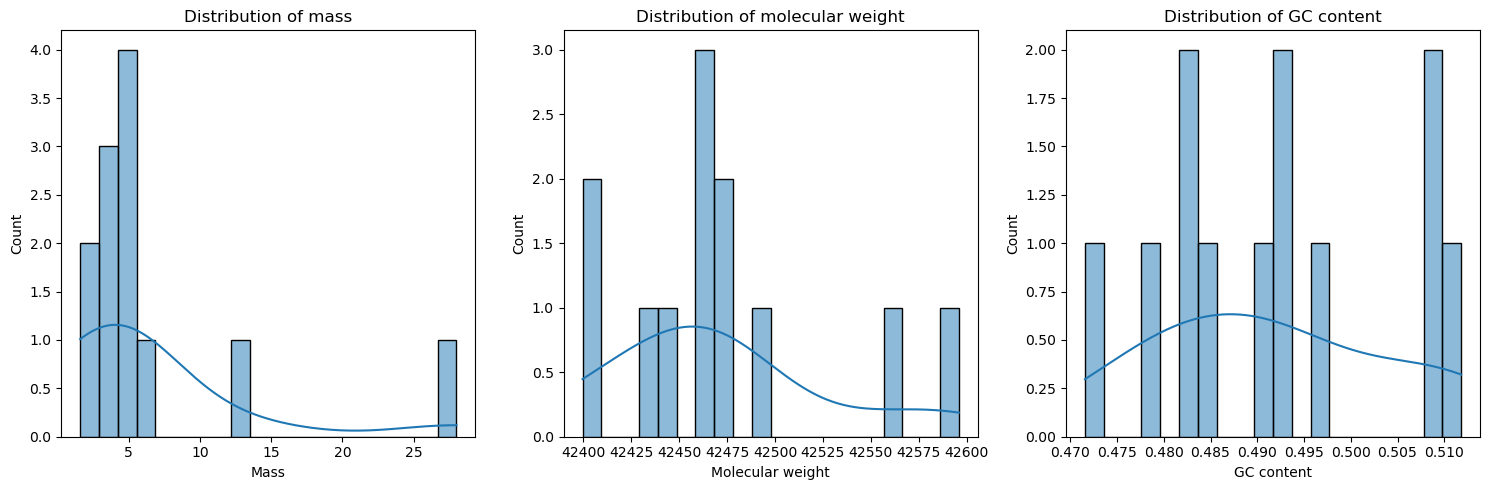

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for each feature
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Mass histogram
sns.histplot(penguins_df['mass'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of mass')
axes[0].set_xlabel('Mass')

# Molecular weight histogram
sns.histplot(penguins_df['Molecular_wt'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of molecular weight')
axes[1].set_xlabel('Molecular weight')

# GC content histogram
sns.histplot(penguins_df['GC content'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribution of GC content')
axes[2].set_xlabel('GC content')

plt.tight_layout()
plt.show()
